<a href="https://colab.research.google.com/github/veronica1908/SALUD_E3_AIII/blob/main/b_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicaciones en operaciones (Salud)

CÉSAR IVÁN ÁVILA DÍAZ

VERÓNICA ANDREA MORALES GONZÁLEZ

Analítica 3

2024-1

REPOSITORIO: https://github.com/veronica1908/SALUD_E3_AIII

#Librerías

In [1]:
# Instalamos librerías que podriamos necesitar
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.0 MB/s eta 0:00:00


In [3]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import a_funciones as funciones

import joblib  ### para guardar modelos
import openpyxl

#Bases de datos

In [4]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/df_final.csv', sep=',')
df_final2

,NRODOC,SEXO,EDAD,YEAR_x,MES_x,ÚLTIMA CLASE FUNCIONAL,QUINQUENIO,YEAR_y,MES_y,VIA INGRESO,...,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),YEAR,MES,PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,AMBITO SEGUN EL MEDICO,CATEGORIAS DIAGNOSTICOS
0,307994,M,89.0,2017,SEPTIEMBRE,SIN CLASIFICAR,85-89,2021,OCTUBRE,Urgencias,...,Urgentologia,0,2017,DICIEMBRE,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio,Cardiología
1,306526,M,79.0,2017,SEPTIEMBRE,SIN CLASIFICAR,75-79,2018,ENERO,Urgencias,...,Medicina Interna,1,2017,OCTUBRE,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Domiciliario,Cardiología
2,307053,M,79.0,2017,SEPTIEMBRE,SIN CLASIFICAR,75-79,2021,OCTUBRE,Urgencias,...,Medicina Interna,3,2017,DICIEMBRE,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Ambulatorio,Endocrinología
3,306688,M,71.0,2017,SEPTIEMBRE,SIN CLASIFICAR,70-74,2018,ENERO,Urgencias,...,Ortopedia,12,2017,NOVIEMBRE,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio,Cardiología
4,306688,M,71.0,2017,SEPTIEMBRE,SIN CLASIFICAR,70-74,2018,ENERO,Urgencias,...,Ortopedia,12,2021,FEBRERO,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Sin dato,Endocrinología
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,313987,F,68.0,2021,OCTUBRE,CLASE FUNCIONAL 2A,65-69,2021,NOVIEMBRE,Urgencias,...,Medicina Interna,2,2021,OCTUBRE,51.5,145.0,Normal,M329 - LUPUS ERITEMATOSO SISTEMICO SIN OTRA ES...,Sin dato,Otras
1243,308394,M,60.0,2021,NOVIEMBRE,CLASE FUNCIONAL 4,60-64,2021,AGOSTO,Urgencias,...,Urologia,0,2021,FEBRERO,62.0,162.0,Normal,G820 - PARAPLEJIA FLACIDA,Sin dato,Otras
1244,306827,M,60.0,2022,FEBRERO,CLASE FUNCIONAL 4,60-64,2021,ABRIL,Urgencias,...,Medicina Interna,4,2018,SEPTIEMBRE,80.0,174.0,Sobrepeso,SIN INFORMACION,Sin dato,Otras
1245,306827,M,60.0,2022,FEBRERO,CLASE FUNCIONAL 4,60-64,2021,ABRIL,Urgencias,...,Medicina Interna,4,2021,FEBRERO,80.0,176.0,Sobrepeso,T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ES...,Sin dato,Otras


In [5]:
#Observar si existen nulos
df_final2.isnull().sum()

NRODOC                          0
SEXO                            0
EDAD                            0
YEAR_x                          0
MES_x                           0
ÚLTIMA CLASE FUNCIONAL          0
QUINQUENIO                      0
YEAR_y                          0
MES_y                           0
VIA INGRESO                     0
SERVICIO EGRESO                 0
TIPO EGRESO                     0
FECHA INGRESO CLINICA           0
FECHA INGRESO SERVICIO          0
FECHA SALIDA                    0
DEMORA ASIGNACION CAMA          0
DEMORA SALIDA CLINICA (DIAS)    0
TRANSFUSION SANGRE              0
ANTIBIOTICO                     0
PROFESIONAL ESPECIALIDAD        0
TIEMPO ESTANCIA (DIAS)          0
YEAR                            0
MES                             0
PESO                            0
TALLA                           0
CLASIFICACION IMC               0
DIAGNOSTICO PRINCIPAL           0
AMBITO SEGUN EL MEDICO          0
CATEGORIAS DIAGNOSTICOS         0
dtype: int64

In [7]:
# Borramos las variables que no necesitamos y no aportan al modelo

columnas_a_borrar = ['NRODOC', 'YEAR_x', 'MES_x', 'YEAR_y', 'MES_y', 'YEAR', 'MES','QUINQUENIO','VIA INGRESO','SERVICIO EGRESO','AMBITO SEGUN EL MEDICO']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,SEXO,EDAD,ÚLTIMA CLASE FUNCIONAL,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA INGRESO SERVICIO,FECHA SALIDA,DEMORA ASIGNACION CAMA,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,CATEGORIAS DIAGNOSTICOS
0,M,89.0,SIN CLASIFICAR,Fallece,2021-10-25 22:42:15.363,2021-10-26 03:00:15.387,2021-10-26 03:50:21,0.000000,0.0,NO,SI,Urgentologia,0,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
1,M,79.0,SIN CLASIFICAR,Remisión a otra institución,2018-01-17 15:23:42.480,2018-01-17 15:23:42.480,2018-01-18 15:43:13,0.000000,0.0,NO,NO,Medicina Interna,1,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
2,M,79.0,SIN CLASIFICAR,Alta Médica,2021-10-21 13:07:56.090,2021-10-23 15:45:37.620,2021-10-27 12:00:50,1.884028,0.0,NO,NO,Medicina Interna,3,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Endocrinología
3,M,71.0,SIN CLASIFICAR,Alta Médica,2018-01-09 15:20:08.597,2018-01-13 16:10:21.003,2018-01-26 14:08:53,3.950000,0.0,NO,NO,Ortopedia,12,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
4,M,71.0,SIN CLASIFICAR,Alta Médica,2018-01-09 15:20:08.597,2018-01-13 16:10:21.003,2018-01-26 14:08:53,3.950000,0.0,NO,NO,Ortopedia,12,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Endocrinología


Convertir a dummies

In [8]:
df_dummies = df_final2.copy()

In [9]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')


Categorías en "SEXO":
    M
    F
Categorías en "ÚLTIMA CLASE FUNCIONAL":
    SIN CLASIFICAR
    CLASE FUNCIONAL 3
    CLASE FUNCIONAL 2A
    CLASE FUNCIONAL 2B
    CLASE FUNCIONAL 4
    CLASE FUNCIONAL 1
Categorías en "TIPO EGRESO":
    Fallece
    Remisión a otra institución
    Alta Médica
    Alta Voluntaria
Categorías en "FECHA INGRESO CLINICA":
    2021-10-25 22:42:15.363
    2018-01-17 15:23:42.480
    2021-10-21 13:07:56.090
    2018-01-09 15:20:08.597
    2021-05-22 12:49:42.590
    2018-01-15 12:04:59.580
    2021-12-11 16:41:11.143
    2018-01-23 13:05:57.547
    2021-10-22 15:08:13.520
    2018-01-23 17:06:19.343
    2018-01-23 18:03:41.553
    2021-07-23 01:02:03.857
    2018-01-16 07:41:31.163
    2018-02-03 19:23:05.190
    2018-03-17 18:18:40.860
    2018-03-13 03:24:41.963
    2018-02-21 13:50:43.493
    2021-08-13 14:38:16.560
    2021-05-10 23:19:42.100
    2021-01-02 20:16:02.040
    2018-03-09 14:23:25.147
    2021-08-01 19:34:34.647
    2021-01-08 19:46:04.800
   

In [ ]:
list_dummies = cat_df_final.difference(['SEXO','FECHA INGRESO CLINICA','FECHA INGRESO SERVICIO','FECHA SALIDA','SERVICIO EGRESO'])
list_dummies

Index(['ANTIBIOTICO', 'CLASIFICACION IMC', 'DIAGNOSTICO PRINCIPAL',
       'PROFESIONAL ESPECIALIDAD', 'TIPO EGRESO', 'TRANSFUSION SANGRE'],
      dtype='object')

In [ ]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [ ]:
df_dummies_final.head(10)

,SEXO,EDAD,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,TIEMPO ESTANCIA (DIAS),PESO,TALLA,...,DIAGNOSTICO PRINCIPAL_N319 - DISFUNCION NEUROMUSCULAR DE LA VEJIGA NO ESPECIFICADA,DIAGNOSTICO PRINCIPAL_N390 - INFECCION DE VIAS URINARIAS SITIO NO ESPECIFICADO,DIAGNOSTICO PRINCIPAL_N40X - HIPERPLASIA DE LA PROSTATA,DIAGNOSTICO PRINCIPAL_R001 - BRADICARDIA NO ESPECIFICADA,DIAGNOSTICO PRINCIPAL_SIN INFORMACION,DIAGNOSTICO PRINCIPAL_T905 - SECUELAS DE TRAUMATISMO INTRACRANEAL,DIAGNOSTICO PRINCIPAL_T908 - SECUELAS DE OTROS TRAUMATISMOS ESPECIFICADOS DE LA CABEZA,DIAGNOSTICO PRINCIPAL_T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ESPINAL,DIAGNOSTICO PRINCIPAL_T983 - SECUELAS DE COMPLICACIONES DE LA ATENCION MEDICA Y QUIRURGICA NO CLASIFICADAS EN OTRAS PARTE,DIAGNOSTICO PRINCIPAL_U072 - COVID-19 VIRUS NO IDENTIFICADO
0,1,89.0,0.000000,0.02008,0.0,0,1,0.0,63.0,162.0,...,False,False,False,False,False,False,False,False,False,False
1,1,79.0,0.000000,0.02008,0.0,0,0,1.0,67.0,153.0,...,False,False,False,False,False,False,False,False,False,False
2,1,79.0,1.884028,0.02008,0.0,0,0,3.0,74.0,158.0,...,False,False,False,False,False,False,False,False,False,False
3,1,71.0,3.950000,0.02008,0.0,0,0,12.0,73.0,169.0,...,False,False,False,False,False,False,False,False,False,False
4,1,71.0,3.950000,0.02008,0.0,0,0,12.0,71.0,169.0,...,False,False,False,False,False,False,False,False,False,False
5,1,64.0,0.000000,0.02008,0.0,0,0,6.0,95.0,161.0,...,False,False,False,False,False,False,False,False,False,False
6,1,64.0,0.000000,0.02008,0.0,0,0,6.0,87.0,154.0,...,False,False,False,False,False,False,False,False,False,False
7,1,64.0,0.000000,0.02008,0.0,0,0,6.0,92.0,157.0,...,False,False,False,False,False,False,False,False,False,False
8,1,67.0,0.299306,0.02008,0.0,0,0,3.0,96.0,163.0,...,False,False,False,False,False,False,False,False,False,False
9,1,67.0,0.299306,0.02008,0.0,0,0,3.0,90.0,163.0,...,False,False,False,False,False,False,False,False,False,False


#Escalado y/o estandarización de los datos

In [ ]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_final['TIEMPO ESTANCIA (DIAS)']
X1 = df_dummies_final.loc[:, ~df_dummies_final.columns.isin(['TIEMPO ESTANCIA (DIAS)'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

#Árbol de decisión

|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano <= 7.89
|   |--- FECHA INGRESO SERVICIO_2021-02-19 20:56:24.373 <= 12.52
|   |   |--- TRANSFUSION SANGRE <= 1.51
|   |   |   |--- value: [3.69]
|   |   |--- TRANSFUSION SANGRE >  1.51
|   |   |   |--- value: [7.83]
|   |--- FECHA INGRESO SERVICIO_2021-02-19 20:56:24.373 >  12.52
|   |   |--- value: [34.00]
|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano >  7.89
|   |--- FECHA INGRESO CLINICA_2018-01-14 14:20:18.567 <= 17.72
|   |   |--- CLASIFICACION IMC_Bajo <= 2.75
|   |   |   |--- value: [36.33]
|   |   |--- CLASIFICACION IMC_Bajo >  2.75
|   |   |   |--- value: [59.00]
|   |--- FECHA INGRESO CLINICA_2018-01-14 14:20:18.567 >  17.72
|   |   |--- value: [3.00]



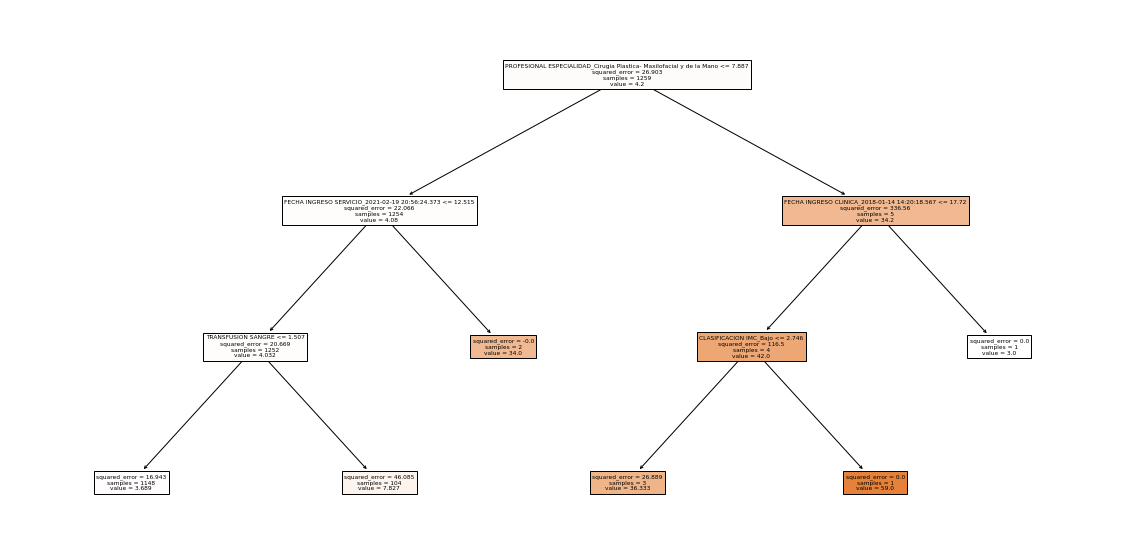

In [ ]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

#Modelos candidatos

In [ ]:
# Define los modelos de regresión seleccionados
m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_linreg, m_tree_reg, m_rf_reg, m_gbt_reg]

# Define los modelos seleccionados
#m_logreg = LogisticRegression()
#m_tree = DecisionTreeClassifier()
#m_rf = RandomForestClassifier()
#m_gbt = GradientBoostingClassifier()

# Lista de modelos seleccionados
#modelos=list([m_logreg,m_tree, m_rf, m_gbt])

Selección de variables

In [ ]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 500 entries, ANTIBIOTICO to TRANSFUSION SANGRE
dtypes: float64(500)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 2813 entries, SEXO to DIAGNOSTICO PRINCIPAL_U072 - COVID-19 VIRUS NO IDENTIFICADO
dtypes: float64(2813)
memory usage: 27.0 MB


Definir modelo ganador

In [ ]:

def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")


MSE para todos los modelos con todas las variables:
LinearRegression: 40.27891519368951
DecisionTreeRegressor: 29.57497180750294
RandomForestRegressor: 24.85695589519191
GradientBoostingRegressor: 22.64424518868327

MSE para todos los modelos con variables seleccionadas:
LinearRegression: 4.890597675951043e+29
DecisionTreeRegressor: 31.531273152116672
RandomForestRegressor: 24.76579099873129
GradientBoostingRegressor: 22.673048615534206


Los resultados del MSE stán en dos conjuntos: uno para todos los modelos con todas las variables y otro para todos los modelos con variables seleccionadas, de tal forma que:

MSE para todos los modelos con todas las variables:
LinearRegression: 40.2789
DecisionTreeRegressor: 29.5750
RandomForestRegressor: 24.8569
GradientBoostingRegressor: 22.6442
Estos valores representan el MSE para cada modelo cuando se utilizan todas las variables disponibles en tu conjunto de datos. Observa que el valor de MSE más bajo corresponde al modelo GradientBoostingRegressor, lo que sugiere que este modelo produce las predicciones más precisas en comparación con los otros modelos.

MSE para todos los modelos con variables seleccionadas:
LinearRegression: 4.8906e+29
DecisionTreeRegressor: 31.5313
RandomForestRegressor: 24.7658
GradientBoostingRegressor: 22.6730
Estos valores representan el MSE para cada modelo cuando se utilizan solo las variables seleccionadas. Aquí, hay un valor muy alto de MSE para el modelo LinearRegression, lo que podría ser un indicio de sobreajuste o algún otro problema. Los otros modelos muestran MSEs similares a los obtenidos con todas las variables, lo que sugiere que la selección de variables no mejoró significativamente su rendimiento en este caso.

Por lo tanto, los modelos RandomForestRegressor y GradientBoostingRegressor parecen ser los más prometedores, mientras que la selección de variables no parece haber mejorado significativamente el rendimiento de los modelos en este caso. Es posible que necesites revisar la selección de variables o probar otros enfoques para mejorar el rendimiento de tu modelo.








Afinamiento de hiperparámetros